<a href="https://colab.research.google.com/github/vamsi2702/es335-24-fall-assignment-2/blob/master/t1_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from mpl_toolkits.mplot3d import Axes3D


In [3]:
import numpy as np

np.random.seed(45)
num_samples = 40

# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

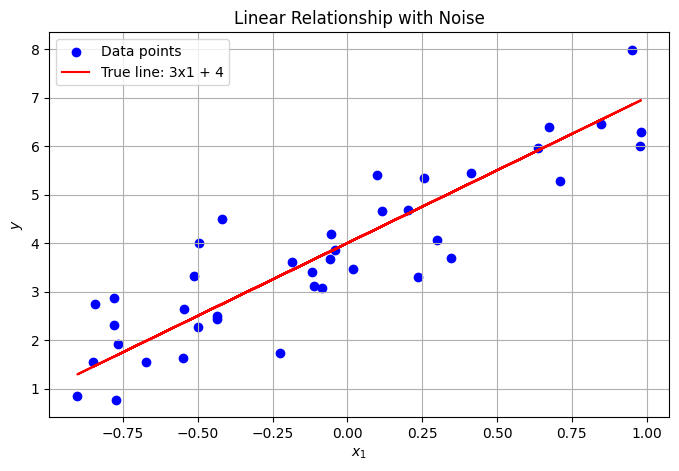

In [4]:
plt.figure(figsize=(8, 5))
plt.scatter(x1, y, color='blue', label='Data points')
plt.plot(x1, 3 * x1 + 4, color='red', label='True line: 3x1 + 4')
plt.title('Linear Relationship with Noise')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
x_tensor = torch.tensor(x1, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
theta0 = torch.tensor([0.0], requires_grad=True)
theta1 = torch.tensor([1.0], requires_grad=True)
def linear_model(x, theta0, theta1):
    return theta1 * x + theta0
predictions = linear_model(x_tensor, theta0, theta1)
loss = torch.mean((predictions - y_tensor) ** 2)
loss.backward()
print(f"Gradient with respect to theta0: {theta0.grad.item()}")
print(f"Gradient with respect to theta1: {theta1.grad.item()}")

Gradient with respect to theta0: -7.616434574127197
Gradient with respect to theta1: -0.39361658692359924


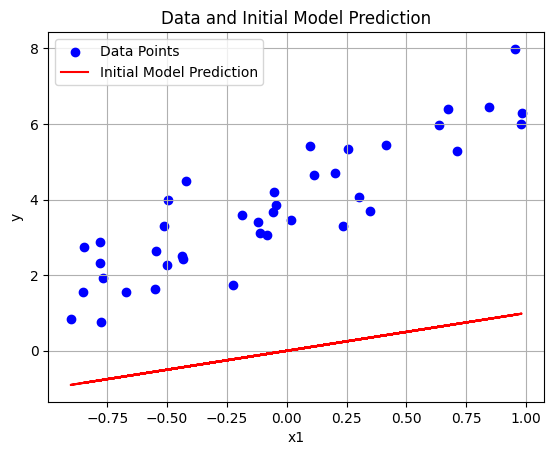

In [6]:
plt.scatter(x1, y, color='blue', label='Data Points')
plt.plot(x1, predictions.detach().numpy(), color='red', label='Initial Model Prediction')
plt.title('Data and Initial Model Prediction')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


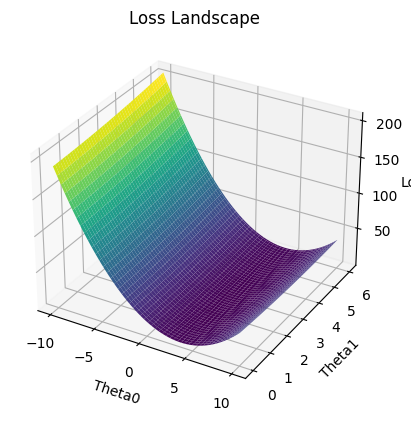

In [7]:
theta0_range = np.linspace(-10, 10, 100)
theta1_range = np.linspace(0, 6, 100)
Theta0, Theta1 = np.meshgrid(theta0_range, theta1_range)


Loss = np.zeros_like(Theta0)
for i in range(Theta0.shape[0]):
    for j in range(Theta0.shape[1]):
        t0 = torch.tensor(Theta0[i, j], dtype=torch.float32)
        t1 = torch.tensor(Theta1[i, j], dtype=torch.float32)
        with torch.no_grad():
            pred = linear_model(x_tensor, t0, t1)
            Loss[i, j] = torch.mean((pred - y_tensor) ** 2).item()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Theta0, Theta1, Loss, cmap='viridis')

ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Loss')
ax.set_title('Loss Landscape')
plt.show()

#Q2
Using the same (
θ
0
,
θ
1
)
 as above, calculate the stochastic gradient for all points in the dataset. Then, find the average of all those gradients and show that the stochastic gradient is a good estimate of the true gradient. [1 mark]

In [8]:
from IPython.display import Image, display


image_url = "https://www.researchgate.net/publication/328106221/figure/fig3/AS:678422925807621@1538760038610/Stochastic-gradient-descent-compared-with-gradient-descent.png"
display(Image(url=image_url))


In [9]:
theta0 = torch.tensor([0.0], requires_grad=True)
theta1 = torch.tensor([1.0], requires_grad=True)
predictions = linear_model(x_tensor, theta0, theta1)
loss = torch.mean((predictions - y_tensor) ** 2)
loss.backward()

true_gradient_theta0 = theta0.grad.item()
true_gradient_theta1 = theta1.grad.item()

stochastic_gradients_theta0 = []
stochastic_gradients_theta1 = []

for i in range(num_samples):
    theta0_sg = torch.tensor([0.0], requires_grad=True)
    theta1_sg = torch.tensor([1.0], requires_grad=True)

    pred_sg = linear_model(x_tensor[i], theta0_sg, theta1_sg)
    loss_sg = (pred_sg - y_tensor[i]) ** 2
    loss_sg.backward()

    stochastic_gradients_theta0.append(theta0_sg.grad.item())
    stochastic_gradients_theta1.append(theta1_sg.grad.item())

avg_stochastic_gradient_theta0 = np.mean(stochastic_gradients_theta0)
avg_stochastic_gradient_theta1 = np.mean(stochastic_gradients_theta1)

print(f"Averaged Stochastic Gradient for Theta0: {avg_stochastic_gradient_theta0}")
print(f"Averaged Stochastic Gradient for Theta1: {avg_stochastic_gradient_theta1}")

print(f"True Gradient with respect to Theta0 from full batch: {true_gradient_theta0}")
print(f"True Gradient with respect to Theta1 from full batch: {true_gradient_theta1}")


Averaged Stochastic Gradient for Theta0: -7.616434812545776
Averaged Stochastic Gradient for Theta1: -0.3936165809631348
True Gradient with respect to Theta0 from full batch: -7.616434574127197
True Gradient with respect to Theta1 from full batch: -0.39361658692359924


This demonstrates that the stochastic gradient is indeed a good estimate of the true gradient, validating the use of stochastic gradient descent (SGD) in optimization tasks.

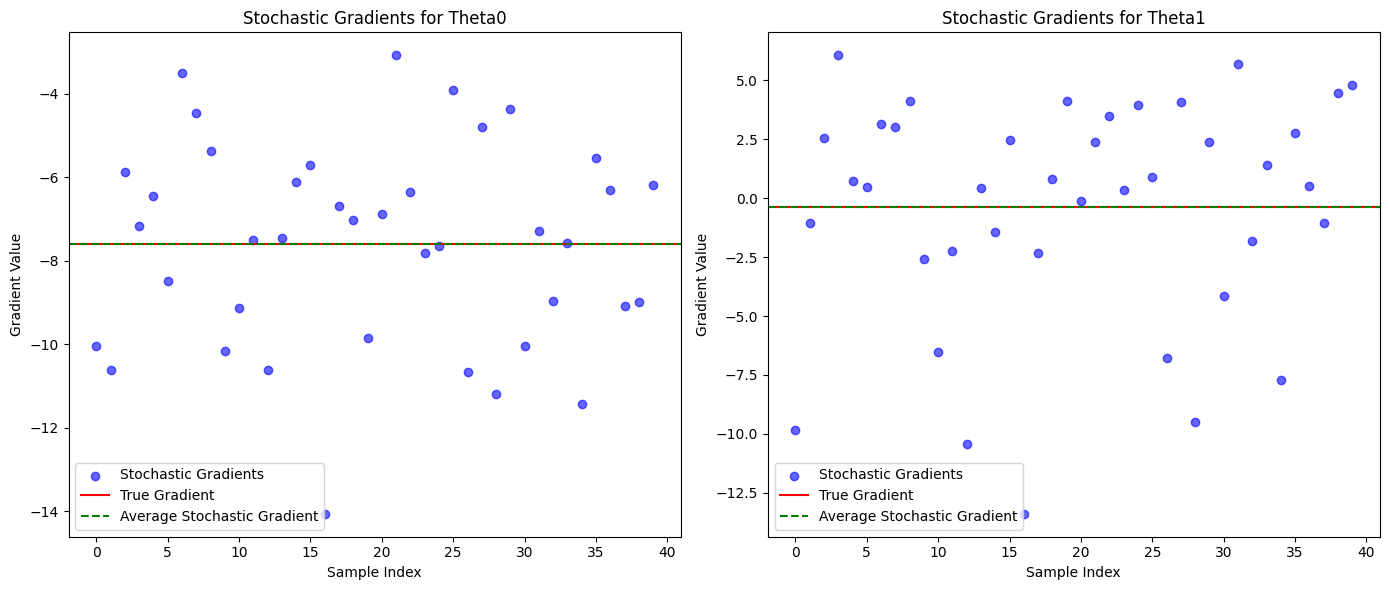

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(num_samples), stochastic_gradients_theta0, label='Stochastic Gradients', color='blue', alpha=0.6)
plt.axhline(y=true_gradient_theta0, color='red', linestyle='-', label='True Gradient')
plt.axhline(y=avg_stochastic_gradient_theta0, color='green', linestyle='--', label='Average Stochastic Gradient')
plt.title('Stochastic Gradients for Theta0')
plt.xlabel('Sample Index')
plt.ylabel('Gradient Value')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(range(num_samples), stochastic_gradients_theta1, label='Stochastic Gradients', color='blue', alpha=0.6)
plt.axhline(y=true_gradient_theta1, color='red', linestyle='-', label='True Gradient')
plt.axhline(y=avg_stochastic_gradient_theta1, color='green', linestyle='--', label='Average Stochastic Gradient')
plt.title('Stochastic Gradients for Theta1')
plt.xlabel('Sample Index')
plt.ylabel('Gradient Value')
plt.legend()

plt.tight_layout()
plt.show()


# Q3

In [11]:
x1_tensor = torch.tensor(x1, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# θ=(X.T*X)−1(X.Ty)
X = np.vstack((np.ones(num_samples), x1)).T
y_vector = y.reshape(-1, 1)
theta_optimal = np.linalg.inv(X.T @ X) @ X.T @ y_vector
w_optimal, b_optimal = theta_optimal[1, 0], theta_optimal[0, 0]

def compute_loss(w, b, x, y):
    return torch.mean((w * x + b - y) ** 2)

def gradient_descent_with_optimal_check_torch(x, y, w_optimal, b_optimal, initial_lr, epsilon, batch_size=None, max_iterations=1000):
    w = torch.tensor(0.0, requires_grad=True)
    b = torch.tensor(0.0, requires_grad=True)
    n = len(x)
    losses = []
    params = []
    iterations = 0
    epochs = 0

    while iterations < max_iterations:
        learning_rate = initial_lr / (1 + 0.1 * epochs)

        if batch_size:  # Mini-batch or stochastic
            indices = np.random.choice(n, batch_size, replace=False)
            x_batch = x[indices]
            y_batch = y[indices]
        else:  # Full-batch
            x_batch = x
            y_batch = y

        y_pred = w * x_batch + b
        loss = torch.mean((y_batch - y_pred) ** 2)


        loss.backward()

        with torch.no_grad():
            w -= learning_rate * w.grad
            b -= learning_rate * b.grad

        w.grad.zero_()
        b.grad.zero_()

        losses.append(loss.item())
        params.append((w.item(), b.item()))

        iterations += 1


        if np.sqrt((w.item() - w_optimal) ** 2 + (b.item() - b_optimal) ** 2) < epsilon:
            break


        if batch_size is None or iterations % (n // batch_size) == 0:
            epochs += 1

    return w.item(), b.item(), losses, params, iterations, epochs


In [12]:
def run_experiment_with_optimal_check_torch(num_trials, initial_lr, gradient_type='full'):
    epsilon = 0.001
    batch_size = 10

    avg_iterations = []
    avg_epochs = []
    all_losses = []
    all_params = []

    for _ in range(num_trials):
        if gradient_type == 'full':
            _, _, losses, params, iterations, epochs = gradient_descent_with_optimal_check_torch(
                x1_tensor, y_tensor, w_optimal, b_optimal, initial_lr, epsilon
            )
        elif gradient_type == 'mini-batch':
            _, _, losses, params, iterations, epochs = gradient_descent_with_optimal_check_torch(
                x1_tensor, y_tensor, w_optimal, b_optimal, initial_lr, epsilon, batch_size=batch_size
            )
        elif gradient_type == 'stochastic':
            _, _, losses, params, iterations, epochs = gradient_descent_with_optimal_check_torch(
                x1_tensor, y_tensor, w_optimal, b_optimal, initial_lr, epsilon, batch_size=1
            )

        avg_iterations.append(iterations)
        avg_epochs.append(epochs)
        all_losses.append(losses)
        all_params.append(params)

    avg_iters = np.mean(avg_iterations)
    avg_eps = np.mean(avg_epochs)
    return avg_iters, avg_eps, all_losses[0], all_params[0]

In [13]:
w_vals = np.linspace(-1, 5, 100)
b_vals = np.linspace(0, 10, 100)
W, B = np.meshgrid(w_vals, b_vals)
Z = np.array([compute_loss(torch.tensor(w), torch.tensor(b), x1_tensor, y_tensor).item() for w, b in zip(np.ravel(W), np.ravel(B))]).reshape(W.shape)

def plot_contour(params, title):
    plt.figure(figsize=(8, 6))
    plt.contour(W, B, Z, levels=np.logspace(-1, 2, 20), cmap='viridis')
    params = np.array(params)
    plt.plot(params[:, 0], params[:, 1], 'ro-', markersize=4)
    plt.title(title)
    plt.xlabel('Weight (w)')
    plt.ylabel('Bias (b)')
    plt.show()


Running experiment for learning rate = 0.05
 iterations for full-batch: 1000.00,  epochs: 1000.00 for lr=0.05
 iterations for mini-batch: 1000.00,  epochs: 250.00 for lr=0.05
 iterations for stochastic: 926.70, epochs: 23.10 for lr=0.05


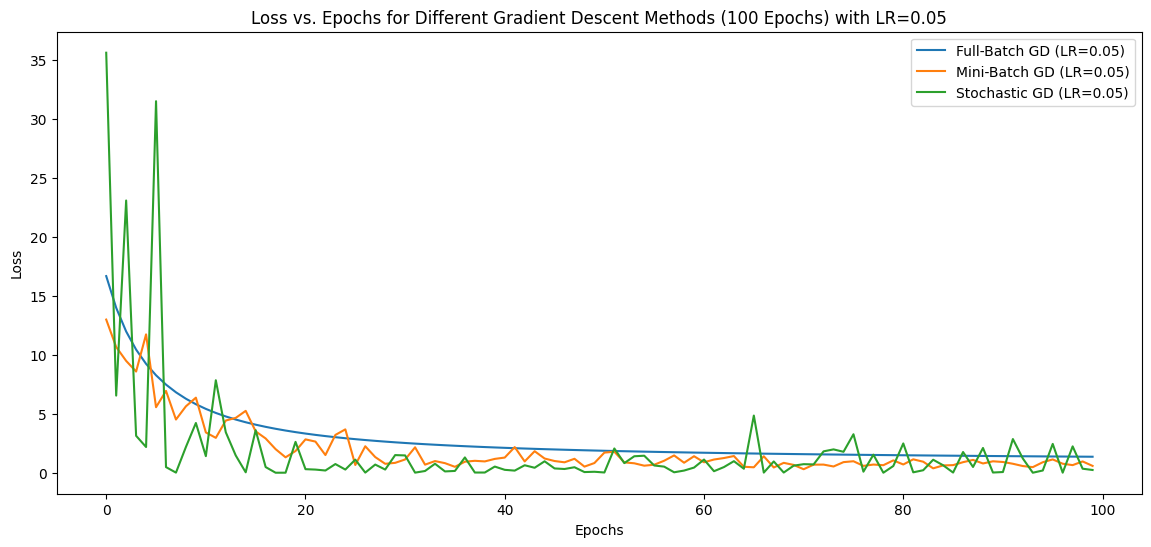

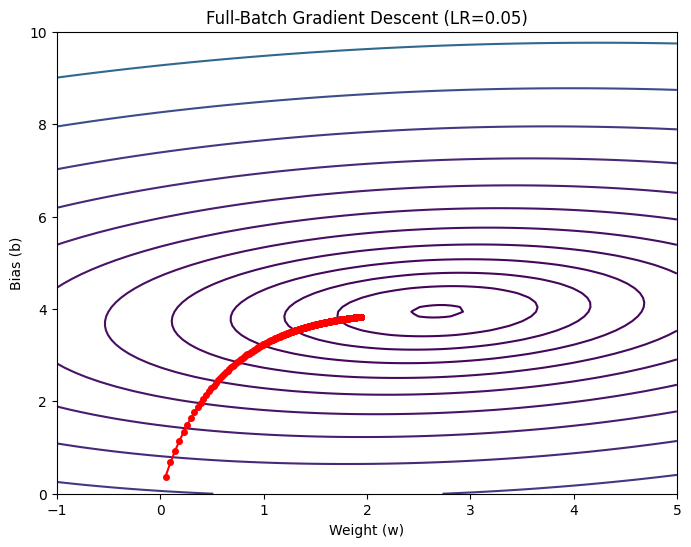

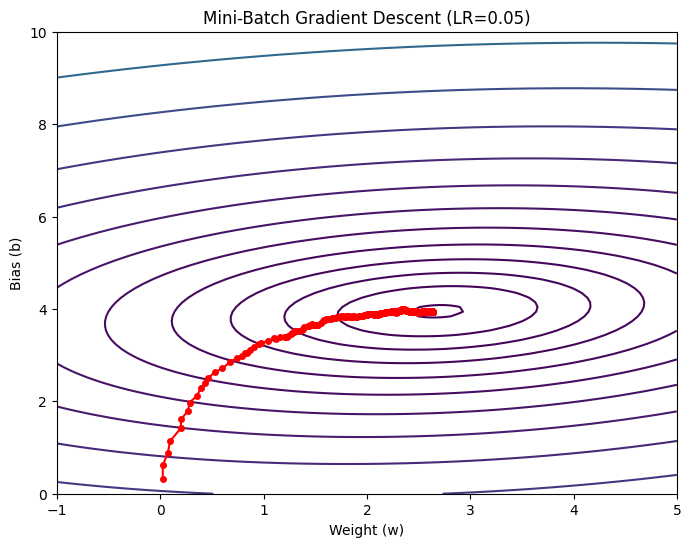

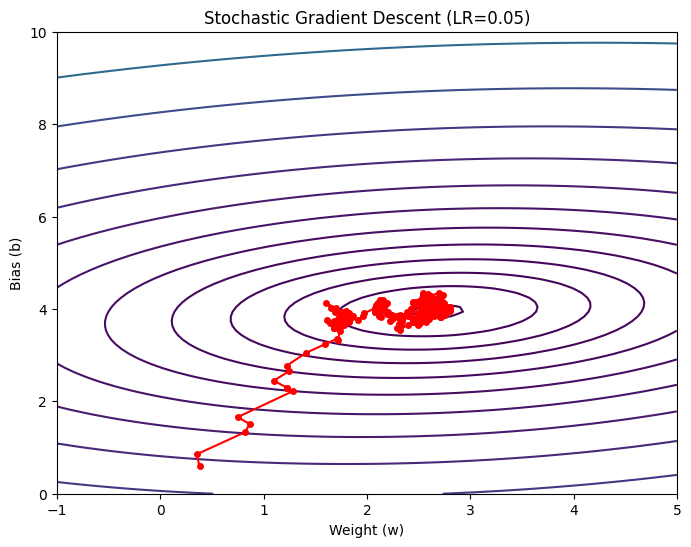

Running experiment for learning rate = 0.01
 iterations for full-batch: 1000.00,  epochs: 1000.00 for lr=0.01
 iterations for mini-batch: 1000.00,  epochs: 250.00 for lr=0.01
 iterations for stochastic: 1000.00, epochs: 25.00 for lr=0.01


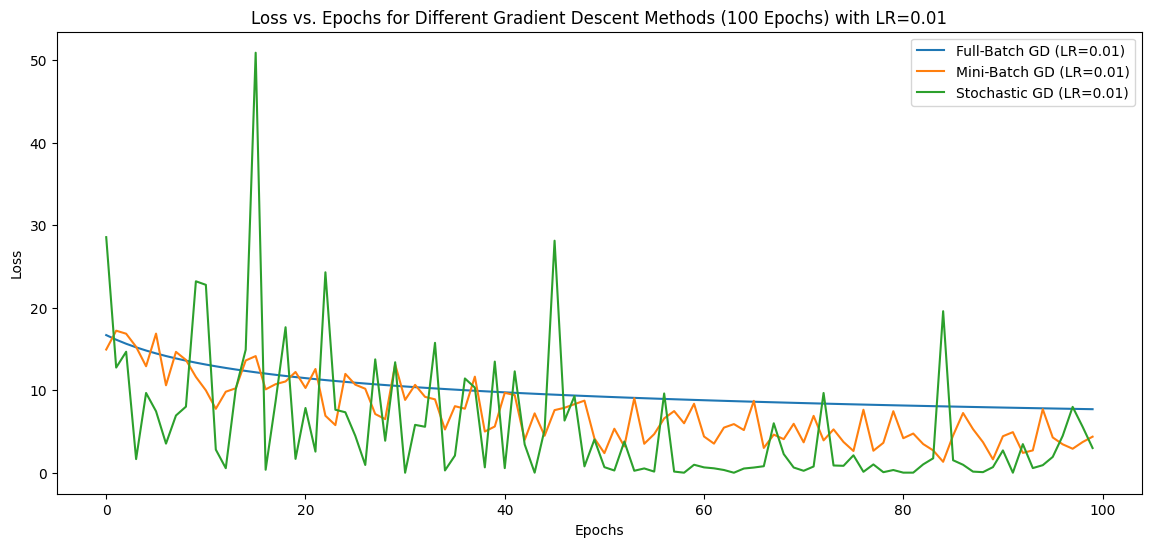

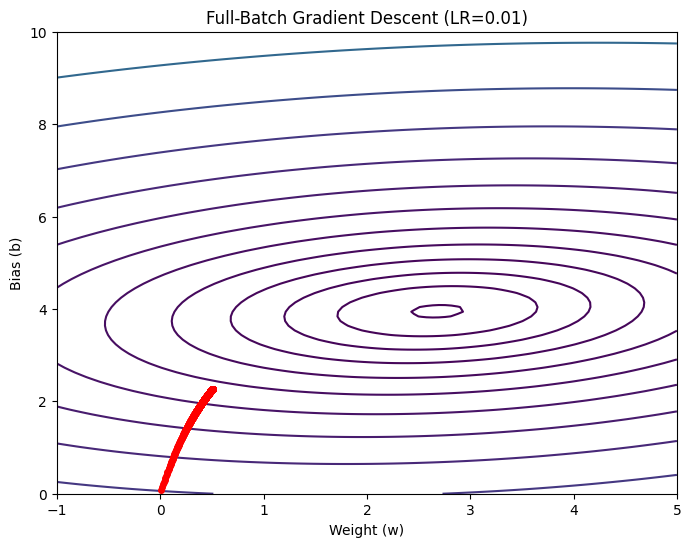

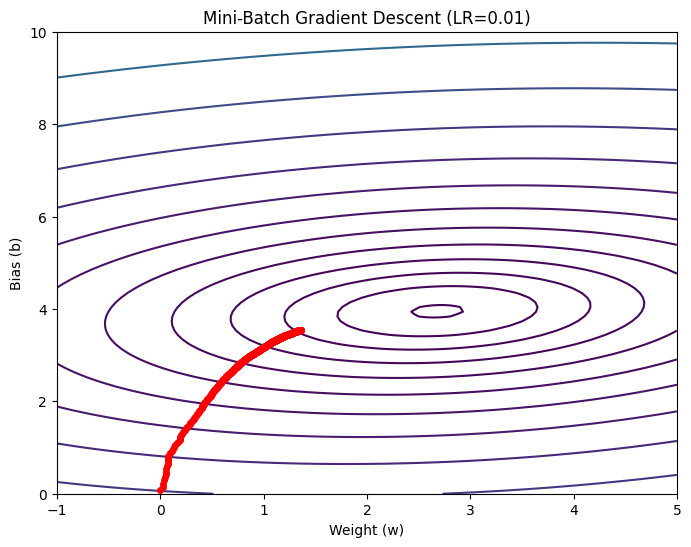

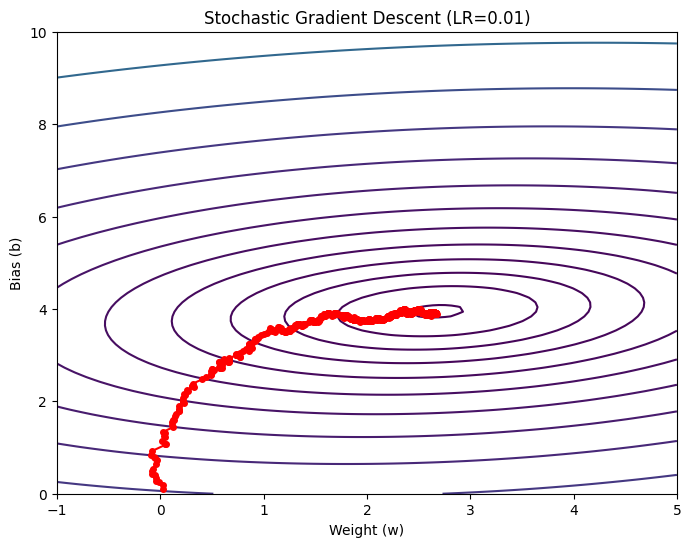

In [24]:
num_trials = 10
learning_rates = [0.05, 0.01]

for lr in learning_rates:
    print(f"Running experiment for learning rate = {lr}")
    avg_iters_full_batch, avg_epochs_full_batch, losses_full_batch, params_full_batch = run_experiment_with_optimal_check_torch(num_trials=num_trials, initial_lr=lr, gradient_type='full')
    avg_iters_mini_batch, avg_epochs_mini_batch, losses_mini_batch, params_mini_batch = run_experiment_with_optimal_check_torch(num_trials=num_trials, initial_lr=lr, gradient_type='mini-batch')
    avg_iters_stochastic, avg_epochs_stochastic, losses_stochastic, params_stochastic = run_experiment_with_optimal_check_torch(num_trials=num_trials, initial_lr=lr, gradient_type='stochastic')


    print(f" iterations for full-batch: {avg_iters_full_batch:.2f},  epochs: {avg_epochs_full_batch:.2f} for lr={lr}")
    print(f" iterations for mini-batch: {avg_iters_mini_batch:.2f},  epochs: {avg_epochs_mini_batch:.2f} for lr={lr}")
    print(f" iterations for stochastic: {avg_iters_stochastic:.2f}, epochs: {avg_epochs_stochastic:.2f} for lr={lr}")


    # Plot Loss vs Epochs for this learning rate
    plt.figure(figsize=(14, 6))
    plt.plot(losses_full_batch[:100], label=f'Full-Batch GD (LR={lr})')
    plt.plot(losses_mini_batch[:100], label=f'Mini-Batch GD (LR={lr})')
    plt.plot(losses_stochastic[:100], label=f'Stochastic GD (LR={lr})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss vs. Epochs for Different Gradient Descent Methods (100 Epochs) with LR={lr}')
    plt.legend()
    plt.show()

    # Plot Contour for this learning rate
    plot_contour(params_full_batch, f'Full-Batch Gradient Descent (LR={lr})')
    plot_contour(params_mini_batch, f'Mini-Batch Gradient Descent (LR={lr})')
    plot_contour(params_stochastic, f'Stochastic Gradient Descent (LR={lr})')

# q4

In [14]:
def gradient_descent_with_momentum(x, y, w_optimal, b_optimal, initial_lr, epsilon, momentum=0.9, batch_size=None, max_iterations=1000):
    w = torch.tensor(0.0, requires_grad=True)
    b = torch.tensor(0.0, requires_grad=True)
    n = len(x)
    velocity_w, velocity_b = 0.0, 0.0
    losses = []
    params = []
    grads = []
    momentums = []
    iterations = 0
    epochs = 0

    while iterations < max_iterations:
        learning_rate = initial_lr / (1 + 0.1 * epochs)

        if batch_size:  # Mini-batch or stochastic
            indices = np.random.choice(n, batch_size, replace=False)
            x_batch = x[indices]
            y_batch = y[indices]
        else:  # Full-batch
            x_batch = x
            y_batch = y


        y_pred = w * x_batch + b
        loss = torch.mean((y_batch - y_pred) ** 2)


        loss.backward()

        grad_w = w.grad.item()
        grad_b = b.grad.item()

        velocity_w = momentum * velocity_w + learning_rate * grad_w
        velocity_b = momentum * velocity_b + learning_rate * grad_b

        with torch.no_grad():
            w -= velocity_w
            b -= velocity_b

        w.grad.zero_()
        b.grad.zero_()

        losses.append(loss.item())
        params.append((w.item(), b.item()))
        grads.append((grad_w, grad_b))
        momentums.append((velocity_w, velocity_b))

        iterations += 1

        if np.sqrt((w.item() - w_optimal) ** 2 + (b.item() - b_optimal) ** 2) < epsilon:
            break

        if batch_size is None or iterations % (n // batch_size) == 0:
            epochs += 1

    return w.item(), b.item(), losses, params, grads, momentums, iterations, epochs

def run_experiment_with_momentum(num_trials, gradient_type='full', momentum=0.9):
    initial_lr = 0.1
    epsilon = 0.001
    batch_size = 10

    avg_iterations = []
    avg_epochs = []
    all_losses = []
    all_params = []
    all_grads = []
    all_momentums = []

    for _ in range(num_trials):
        if gradient_type == 'full':
            _, _, losses, params, grads, momentums, iterations, epochs = gradient_descent_with_momentum(
                x1_tensor, y_tensor, w_optimal, b_optimal, initial_lr, epsilon, momentum
            )
        elif gradient_type == 'stochastic':
            _, _, losses, params, grads, momentums, iterations, epochs = gradient_descent_with_momentum(
                x1_tensor, y_tensor, w_optimal, b_optimal, initial_lr, epsilon, momentum, batch_size=1
            )

        avg_iterations.append(iterations)
        avg_epochs.append(epochs)
        all_losses.append(losses)
        all_params.append(params)
        all_grads.append(grads)
        all_momentums.append(momentums)

    avg_iters = np.mean(avg_iterations)
    avg_eps = np.mean(avg_epochs)
    return avg_iters, avg_eps, all_losses[0], all_params[0], all_grads[0], all_momentums[0]


In [15]:
num_trials = 10
avg_iters_momentum_full_batch, avg_epochs_momentum_full_batch, losses_momentum_full_batch, params_momentum_full_batch, grads_momentum_full_batch, momentums_momentum_full_batch = run_experiment_with_momentum(num_trials=num_trials, gradient_type='full')
avg_iters_momentum_stochastic, avg_epochs_momentum_stochastic, losses_momentum_stochastic, params_momentum_stochastic, grads_momentum_stochastic, momentums_momentum_stochastic = run_experiment_with_momentum(num_trials=num_trials, gradient_type='stochastic')

print(f"Average iterations for full-batch with momentum: {avg_iters_momentum_full_batch:.2f}, Average epochs: {avg_epochs_momentum_full_batch:.2f}")
print(f"Average iterations for stochastic with momentum: {avg_iters_momentum_stochastic:.2f}, Average epochs: {avg_epochs_momentum_stochastic:.2f}")

Average iterations for full-batch with momentum: 174.00, Average epochs: 173.00
Average iterations for stochastic with momentum: 1000.00, Average epochs: 25.00


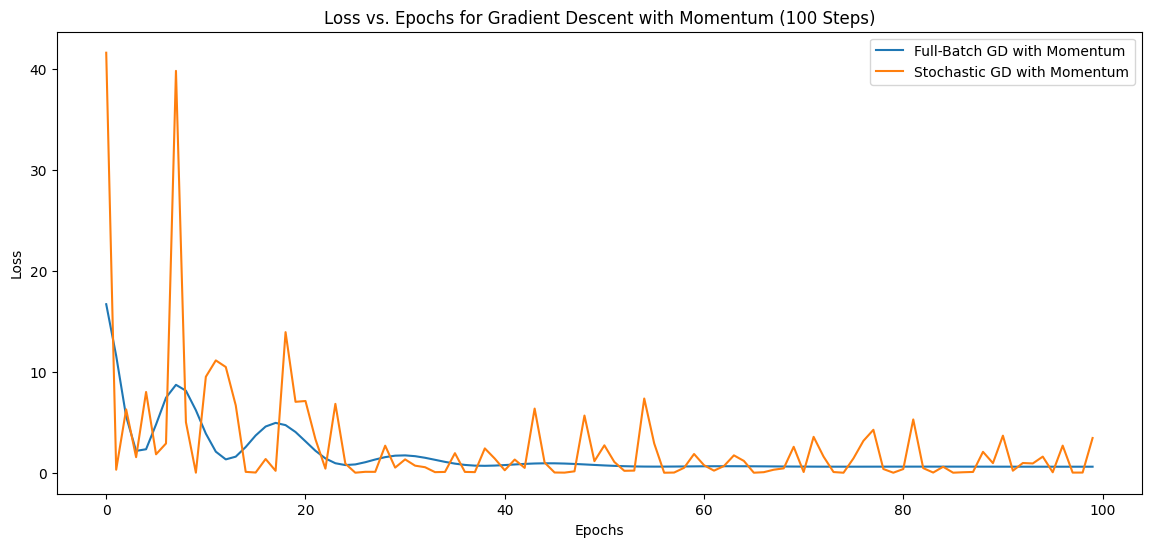

In [16]:
plt.figure(figsize=(14, 6))
plt.plot(losses_momentum_full_batch[:100], label='Full-Batch GD with Momentum')
plt.plot(losses_momentum_stochastic[:100], label='Stochastic GD with Momentum')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs for Gradient Descent with Momentum (100 Steps)')
plt.legend()
plt.show()

 In stochastic gradient descent, the gradient is computed using only one random data point (or a very small mini-batch, often batch size of 1) at each iteration. This leads to high variance in the gradients because a single data point can significantly influence the direction of the gradient update.

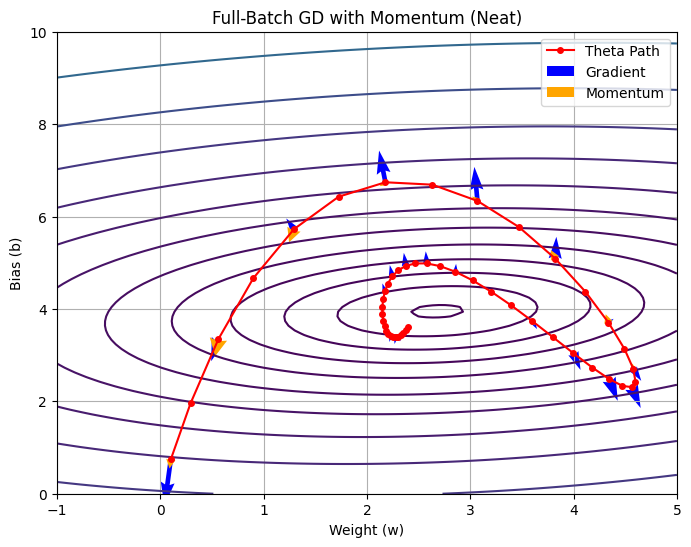

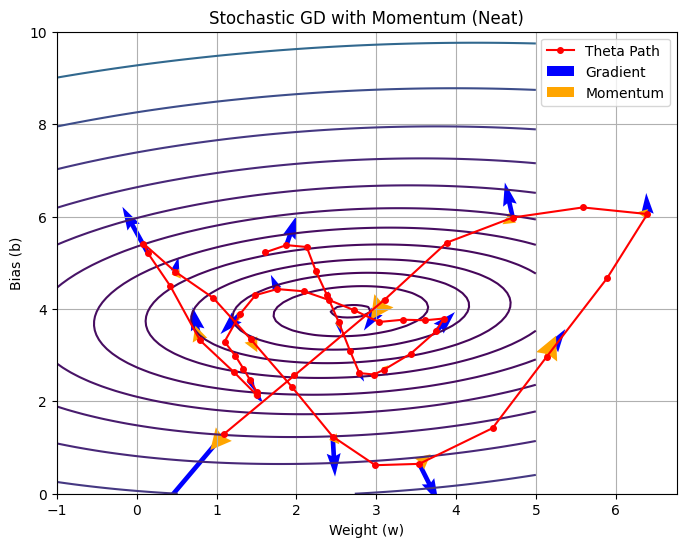

In [17]:
w_vals = np.linspace(-1, 5, 100)
b_vals = np.linspace(0, 10, 100)
W, B = np.meshgrid(w_vals, b_vals)
Z = np.array([compute_loss(torch.tensor(w), torch.tensor(b), x1_tensor, y_tensor).item() for w, b in zip(np.ravel(W), np.ravel(B))]).reshape(W.shape)

def plot_contour_with_vectors(params, grads, momentums, title):
    plt.figure(figsize=(8, 6))
    plt.contour(W, B, Z, levels=np.logspace(-1, 2, 20), cmap='viridis')
    params = np.array(params)[:50]
    grads = np.array(grads)[:50]
    momentums = np.array(momentums)[:50]

    # Plot the parameter trajectory
    plt.plot(params[:, 0], params[:, 1], 'ro-', markersize=4, label='Theta Path')

    # Plot vectors for gradients and momentum
    for i in range(0, len(params), 2):  # Plot every 2nd point to reduce clutter
        plt.quiver(params[i, 0], params[i, 1], grads[i, 0], grads[i, 1], color='blue', scale=100, label='Gradient' if i == 0 else "")
        plt.quiver(params[i, 0], params[i, 1], momentums[i, 0], momentums[i, 1], color='orange', scale=50, headwidth=5, label='Momentum' if i == 0 else "")

    plt.title(title)
    plt.xlabel('Weight (w)')
    plt.ylabel('Bias (b)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Re-plot with the adjusted function
plot_contour_with_vectors(params_momentum_full_batch, grads_momentum_full_batch, momentums_momentum_full_batch, 'Full-Batch GD with Momentum (Neat)')
plot_contour_with_vectors(params_momentum_stochastic, grads_momentum_stochastic, momentums_momentum_stochastic, 'Stochastic GD with Momentum (Neat)')


Momentum can help guide the updates by accumulating past gradients, but since stochastic gradient descent uses only one data point per update, the gradients themselves are highly variable. Even though momentum tries to smooth out the updates, it can't fully counteract the randomness of stochastic gradient descent.